<a href="https://colab.research.google.com/github/santiagonajera/LocalizacionCentrosDeDistribucion/blob/main/Clusters_MetodoCodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

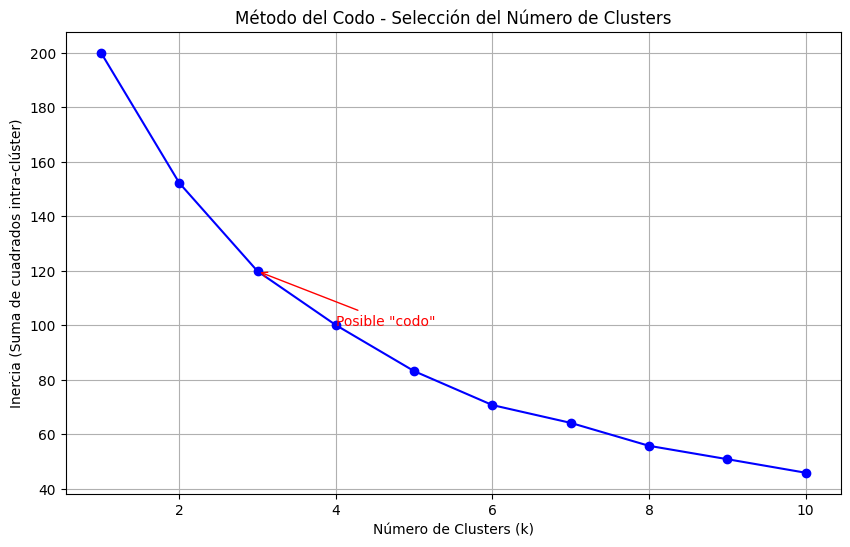

Inercias por número de clusters:
k=1: 199.99999999999997
k=2: 152.18062872007704
k=3: 119.77499092049355
k=4: 100.00641680079649
k=5: 83.09725170381077
k=6: 70.63471382782467
k=7: 64.09970589373442
k=8: 55.68089080212451
k=9: 50.77380818251046
k=10: 45.80151013697161


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Datos proporcionados (copiados desde tu tabla)
data = {
    'Estudiantes': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
                    'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
                    'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30',
                    'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40',
                    'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50'],
    'Edad': [42, 47, 39, 39, 24, 33, 29, 33, 40, 21,
             28, 40, 31, 20, 49, 34, 33, 34, 21, 32,
             29, 49, 41, 22, 45, 41, 47, 27, 45, 27,
             29, 44, 47, 35, 31, 31, 45, 39, 50, 20,
             39, 33, 37, 22, 45, 41, 41, 34, 30, 50],
    'Peso': [106, 80, 100, 71, 98, 79, 98, 106, 85, 97,
             105, 88, 81, 90, 105, 94, 88, 87, 110, 93,
             82, 100, 96, 71, 84, 50, 93, 93, 65, 55,
             99, 89, 79, 110, 52, 83, 102, 88, 89, 60,
             92, 78, 74, 72, 108, 87, 101, 59, 95, 84],
    'Altura': [172, 199, 154, 162, 183, 170, 154, 163, 163, 151,
               172, 189, 155, 159, 154, 188, 195, 155, 200, 210,
               155, 186, 171, 197, 180, 192, 192, 151, 159, 198,
               210, 159, 165, 175, 168, 170, 164, 171, 185, 205,
               153, 164, 208, 207, 182, 206, 184, 169, 159, 165],
    'Latidos del corazon': [82, 69, 54, 72, 54, 75, 78, 86, 72, 60,
                            76, 57, 50, 59, 73, 83, 48, 59, 82, 89,
                            62, 65, 73, 49, 71, 82, 85, 49, 68, 63,
                            68, 88, 75, 50, 68, 76, 55, 59, 63, 52,
                            66, 66, 64, 64, 72, 54, 60, 63, 58, 86]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Eliminar la columna 'Estudiantes' porque no es numérica
X = df.drop('Estudiantes', axis=1)

# Escalar los datos (es importante para K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo: probar k de 1 a 10
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='b')
plt.title('Método del Codo - Selección del Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de cuadrados intra-clúster)')
plt.grid(True)

# Añadir anotaciones para ayudar a identificar el "codo"
plt.annotate('Posible "codo"', xy=(3, inertias[2]), xytext=(4, inertias[3]),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

plt.show()

# Mostrar el valor de inercia
print("Inercias por número de clusters:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: {inertia}")

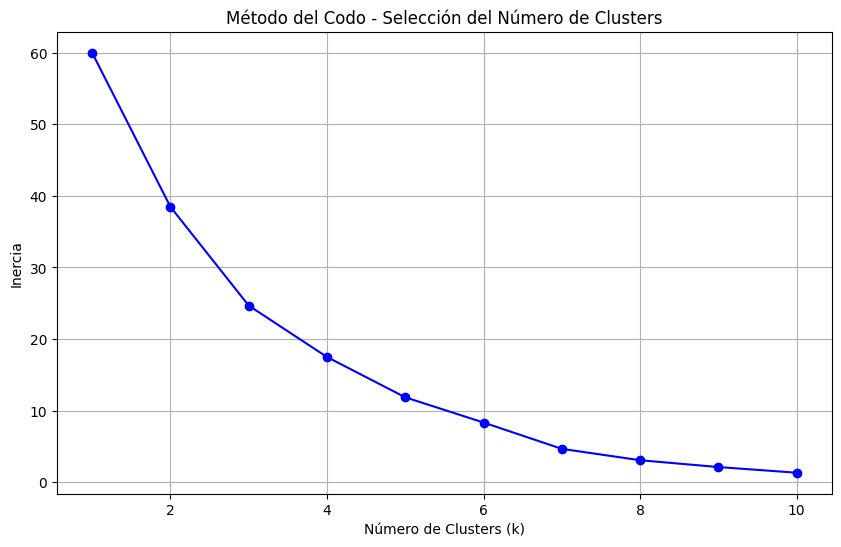

Inercias por número de clusters:
k=1: 59.99999999999999
k=2: 38.47023042857545
k=3: 24.676080038509653
k=4: 17.487852320209377
k=5: 11.856073331046302
k=6: 8.331471227227972
k=7: 4.654209137186529
k=8: 3.064042091472436
k=9: 2.111678534475913
k=10: 1.3188721979224625


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Datos proporcionados (con corrección de formato)
data = {
    'CIUDAD': [
        'La Paz', 'El Alto', 'Santa Cruz de la Sierra', 'Montero', 'Warnes',
        'Cochabamba', 'Quillacollo', 'Sacaba', 'Oruro', 'Sucre',
        'Potosí', 'Tarija', 'Trinidad', 'Cobija', 'Viacha'
    ],
    'LATITUD': [
        -164.897, -165.047, -177.833, -173.387, -175.134,
        -173.895, -174.023, -174.047, -179.715, -190.196,
        -195.889, -215.355, -148.344, -110.264, -166.500
    ],
    'LONGITUD': [
        -681.193, -681.630, -631.821, -632.554, -631.470,
        -661.568, -662.857, -660.360, -671.116, -652.610,
        -657.531, -647.296, -649.052, -687.692, -683.000
    ],
    'DEMANDA (PALLETS/AÑO)': [
        18, 12, 26, 6, 7, 16, 5, 5.5, 9, 7, 5, 6, 4, 2.5, 4.5
    ],
    'POBLACIÓN APROX.': [
        835, 1100000, 1900000, 150, 130, 850, 140, 200, 270, 300,
        240, 290, 130, 60, 160
    ]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Eliminar la columna de nombres de ciudad (no es numérica)
X = df.drop('CIUDAD', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo: probar k desde 1 hasta 10
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linestyle='-', color='b')
plt.title('Método del Codo - Selección del Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Mostrar inercias
print("Inercias por número de clusters:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: {inertia}")